# `20180813a` - Checking code for series acquisition - server

In [1]:
#!/usr/bin/python
import spidev
#import RPi.GPIO as GPIO
import time
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import json
import time
from pyUn0 import *
%matplotlib inline

Not loading RPi.GPIO as not on RPi


In [2]:
x = us_spi()
x.JSON["firmware_version"]="e_un0"
x.JSON["experiment"]["id"] = "20180813a"
x.JSON["experiment"]["description"]="Testing if the lib works"
x.JSON["experiment"]["probe"]="piezo"
x.JSON["experiment"]["target"] = "a reflector few cms away"
x.JSON["V"]="48"
x.JSON["N"] = 1 # Experiment ID

In [3]:
x.init()                                    # Inits the FPGA
x.setMultiLines(True)				        # Multi lines acquisition	
x.setNLines(1240)				            # Setting the number of lines
x.setPeriodAcq(1000*1000) 					# 1000 us delays
Curve = x.CreateDACCurve(300,900,True)[0]   # Sets the DAC, 50mV to 850mv

pyUn0.py:149: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(CS_FLASH,GPIO.OUT)
pyUn0.py:152: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(PRESET,GPIO.OUT)


Reset GPIO 23 - Low 1s
Reset GPIO 23 - High 0.2s
spi.cshigh is False
spi mode is 1
spi maxspeed is 2000000hz
Remember to indicate how many lines
Number of lines: 1240
Period between two acquisitions: 100000 us -- 0x1 0x86 0xa0
Setting up the DAC


In [9]:
x.setMsps(7) 					            # Acquisition Freq
x.setNLines(255)
A = x.setTimings(200,100,2000,25000,105000)	# Settings the series of pulses
print A

Acquisition frequency set at 8.0 Msps
Number of lines: 255
Pulse width: 200  ns --  0x14
Pulses delay: 300  ns --  0x1e
Poff: 2300  ns --  0x0 0xe6
Delay between: 25000 ns --  0xc 0x80
Acquisition length:  105000 ns --  0x34 0x80
setPulseTrain Lacq 134400
NAcq = 163200
(163200, 80, 8.0, 255)


In [10]:
x.JSON["N"] = 17
# Do the acquisition
x.JSON["data"] = x.doAcquisition()

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Took 32.74 seconds to transfer.
for 326402 transfers of data
20180813a-17.json: file saved.


Data acquired


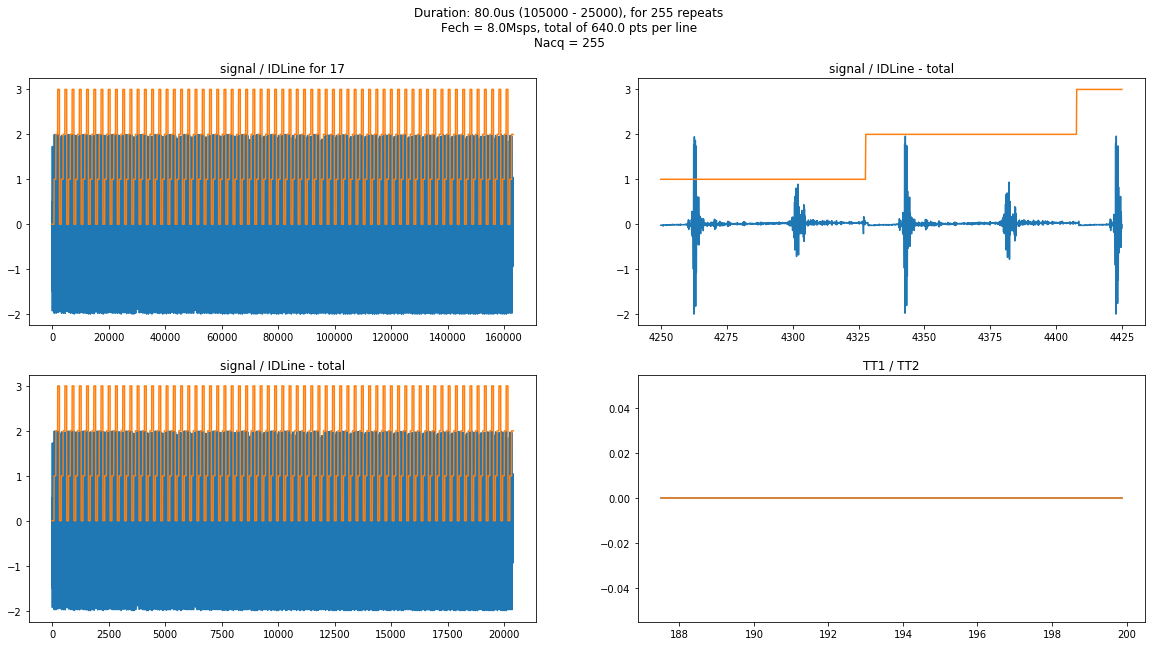

In [2]:
for FILE in ["data/20180813a-17.json"]:
    x = us_json()
    x.JSONprocessing(FILE)
    # row and column sharing
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,10))
    Duration = (x.parameters['LengthAcq']-x.parameters['DeltaAcq'])/1000.0
    Title = "Duration: "+str(Duration)+"us ("+str(x.parameters['LengthAcq'])+" - "
    Title+= str(x.parameters['DeltaAcq'])+"), for "+str(x.Nacq)
    Title += " repeats\n"
    Title += "Fech = "+str(x.f)+"Msps, total of "+str(float(x.f)*Duration)+" pts per line\n" 
    Title += "Nacq = "+str(x.Nacq)
    plt.suptitle(Title)
    #plt.figure()
    A = 4000
    B = 6000
    ax1.plot(x.tmp)
    ax1.plot(x.IDLine)
    ax1.set_title('signal / IDLine for '+str(x.N))
    A =34000
    ax2.plot(x.t[A:A+1400],x.tmp[A:A+1400])
    ax2.plot(x.t[A:A+1400],x.IDLine[A:A+1400])
    ax2.set_title('signal / IDLine - total')
    ax3.plot(x.t,x.tmp)
    ax3.plot(x.t,x.IDLine)
    ax3.set_title('signal / IDLine - total')
    ax4.plot(x.t[1500:1600],x.TT1[1500:1600])
    ax4.plot(x.t[1500:1600],x.TT2[1500:1600])
    ax4.set_title('TT1 / TT2')
    plt.show()
    #plt.tight_layout()
    FileName = "images/"+x.iD+"-"+str(x.N)+"-all.jpg"
    f.savefig(FileName)

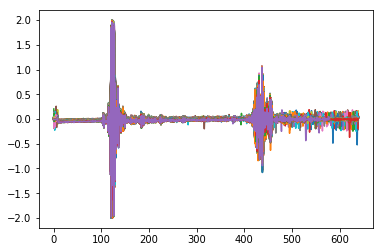

In [3]:
for k in range(255):
    n = 0
    A = (n-1+k)*640+13500
    B = (n+k)*640+13500
    plt.plot(x.tmp[A:B])
plt.show()

Data acquired


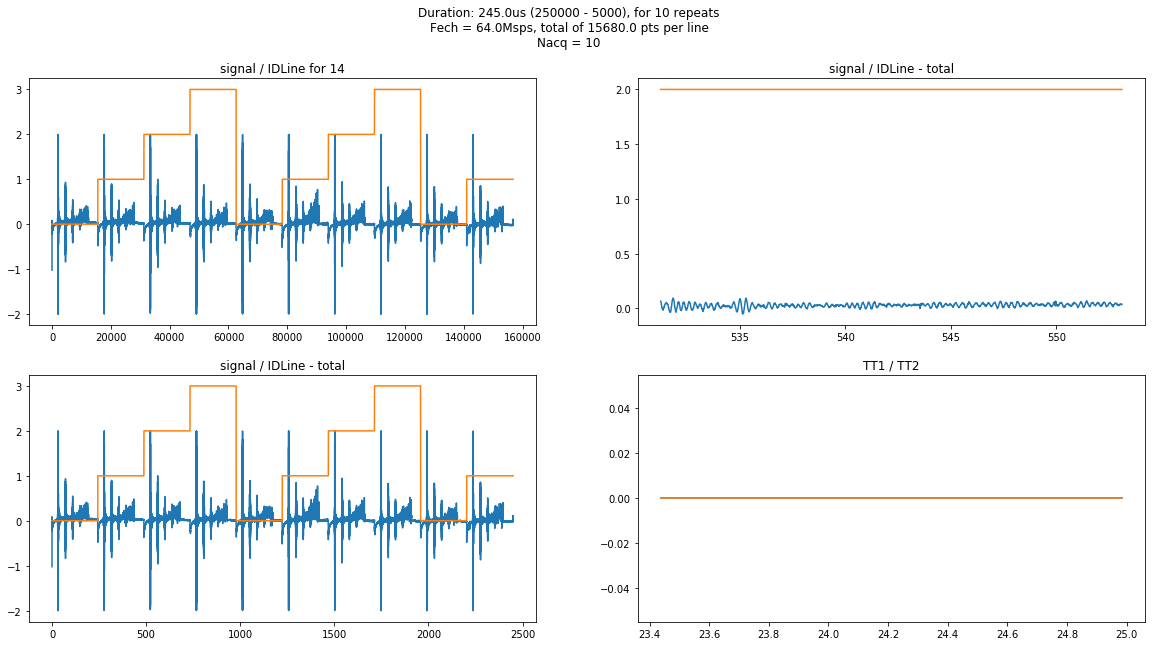

In [4]:
for FILE in ["data/20180813a-14.json"]:
    x = us_json()
    x.JSONprocessing(FILE)
    # row and column sharing
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,10))
    Duration = (x.parameters['LengthAcq']-x.parameters['DeltaAcq'])/1000.0
    Title = "Duration: "+str(Duration)+"us ("+str(x.parameters['LengthAcq'])+" - "
    Title+= str(x.parameters['DeltaAcq'])+"), for "+str(x.Nacq)
    Title += " repeats\n"
    Title += "Fech = "+str(x.f)+"Msps, total of "+str(float(x.f)*Duration)+" pts per line\n" 
    Title += "Nacq = "+str(x.Nacq)
    plt.suptitle(Title)
    #plt.figure()
    A = 4000
    B = 6000
    ax1.plot(x.tmp)
    ax1.plot(x.IDLine)
    ax1.set_title('signal / IDLine for '+str(x.N))
    A =34000
    ax2.plot(x.t[A:A+1400],x.tmp[A:A+1400])
    ax2.plot(x.t[A:A+1400],x.IDLine[A:A+1400])
    ax2.set_title('signal / IDLine - total')
    ax3.plot(x.t,x.tmp)
    ax3.plot(x.t,x.IDLine)
    ax3.set_title('signal / IDLine - total')
    ax4.plot(x.t[1500:1600],x.TT1[1500:1600])
    ax4.plot(x.t[1500:1600],x.TT2[1500:1600])
    ax4.set_title('TT1 / TT2')
    plt.show()
    #plt.tight_layout()
    FileName = "images/"+x.iD+"-"+str(x.N)+"-all.jpg"
    f.savefig(FileName)

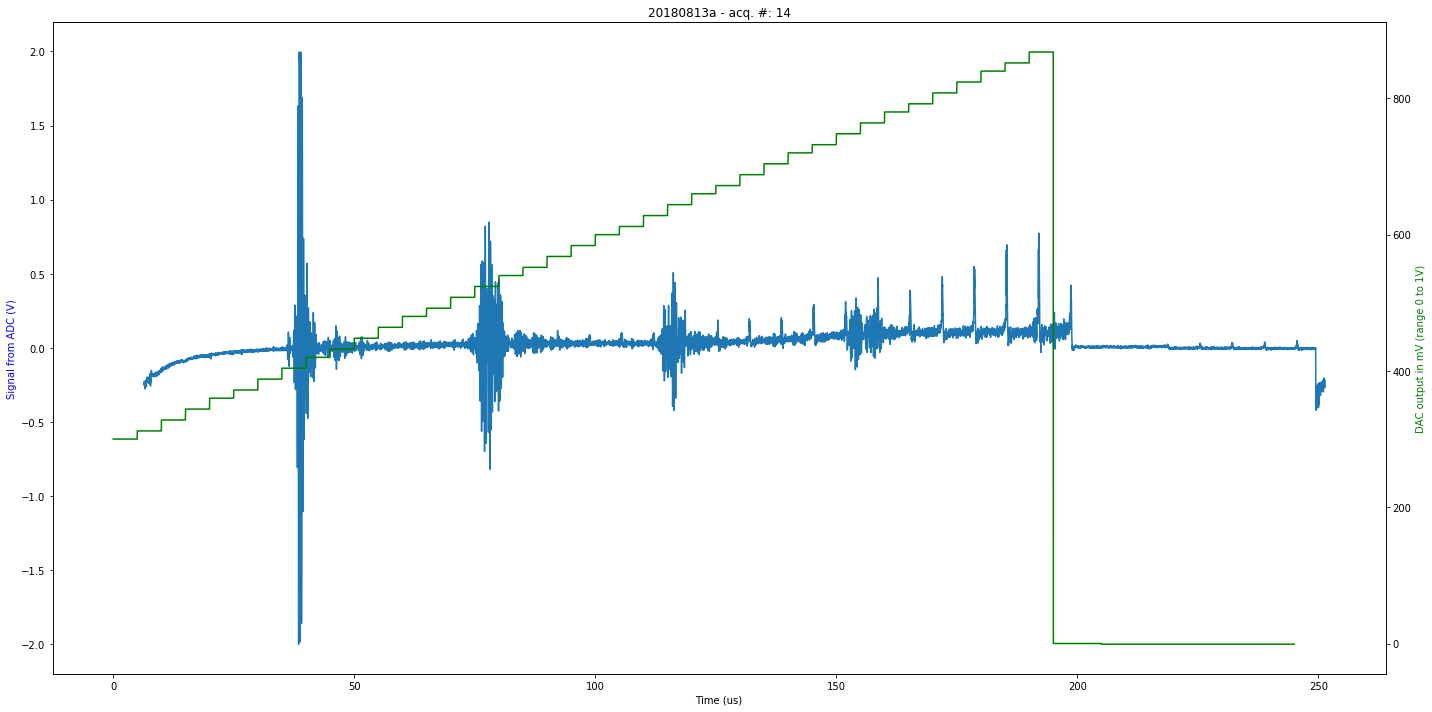

In [22]:
TSeries = [i + 1.28*x.timings["t4"]/1000.0 for i in x.t[0:15680]]
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx() 
ax2.plot(x.t[0:15680], x.tdac[0:15680], 'g-')
ax1.plot(TSeries,x.tmp[5*15680:6*15680])
plt.title( x.iD + " - acq. #: "+ str(x.N))
ax1.set_xlabel('Time (us)')
ax1.set_ylabel('Signal from ADC (V)', color='b')
ax2.set_ylabel('DAC output in mV (range 0 to 1V)', color='g')
plt.tight_layout()
FileName = "images/"+x.iD+"-"+str(x.N)+".jpg"
plt.savefig(FileName)
plt.show() 

In [10]:
x.timings

{u'Fech': 64.0,
 u'LAcq': 245,
 u'NAcq': 156800,
 u'NLines': 10,
 u't1': 200,
 u't2': 100,
 u't3': 2000,
 u't4': 5000,
 u't5': 250000}

In [21]:
np.max( x.tdac[0:15680] )

868.0